In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/../Hourly Load Data.csv")

**1. DATA ANALYSIS**

In [ ]:
data.head()

,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     32896 non-null  object 
 1   PJM_Load_MW  32896 non-null  float64
dtypes: float64(1), object(1)
memory usage: 514.1+ KB


In [ ]:
# summary
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PJM_Load_MW,32896.0,29766.427408,5849.769954,17461.0,25473.0,29655.0,33073.25,54030.0


In [ ]:
Dup_Rows = data[data.duplicated()]
print("\n\nDuplicate Rows : \n {}".format(Dup_Rows)) #duplicates yok.



Duplicate Rows : 
 Empty DataFrame
Columns: [Datetime, PJM_Load_MW]
Index: []


In [ ]:
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
type(data['Datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

**✅ Veriyi gün, saat, yıl gibi değişkenlerle değerlendirebilmek için tarih değişkeni üzerinde format değişikliği yapılması ve gün, saat, yıl, sezon birimlerine ayrılması gerekmektedir.**

In [ ]:
data['Datetime'] = data['Datetime'].dt.floor('H')

#Her yıldaki satır sayısını kontrol etme
data.groupby(data['Datetime'].dt.year).count()

# Enerji tüketim değerlerinin sayısala dönüştürülmesi
data['PJM_Load_MW'] = pd.to_numeric(data['PJM_Load_MW'], errors='coerce')

#Her sütunda eksik değerleri kontrol etme
data.isnull().sum()

Datetime       0
PJM_Load_MW    0
dtype: int64

In [ ]:
for date in data[data.isna().any(axis=1)].Datetime:
    data[data.Datetime == date] = data[data.Datetime == date].fillna\
                                                   (data[(data.Datetime.dt.year == date.year) &\
                                                               (data.Datetime.dt.month == date.month) & \
                                                               (data.Datetime.dt.weekday == date.dayofweek) &\
                                                               (data.Datetime.dt.hour == date.hour) \
                                                               ].mean())

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/.../Hourly Load Data.csv',usecols=['Datetime','PJM_Load_MW'], parse_dates=['Datetime'])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     32896 non-null  datetime64[ns]
 1   PJM_Load_MW  32896 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 514.1 KB


In [ ]:
def season_calc(month):
    if month in [6,7,8,9,10]:
        return "summer"
    else:
        return "winter"
      
weekdays = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday', 6:'Sunday'}
data2['Date'] = pd.to_datetime(data2.Datetime.dt.date)
data2['year'] = data2.Datetime.dt.year
data2['month'] = data2.Datetime.dt.month
data2['day'] = data2.Datetime.dt.day
data2['hour'] = data2.Datetime.dt.hour
data2['weekday'] = data2.Datetime.dt.weekday.map(weekdays)
data2['season'] = data2.Datetime.dt.month.apply(season_calc)

In [ ]:
data2.head()

,Datetime,PJM_Load_MW,Date,year,month,day,hour,weekday,season
0,1998-12-31 01:00:00,29309.0,1998-12-31,1998,12,31,1,Thursday,winter
1,1998-12-31 02:00:00,28236.0,1998-12-31,1998,12,31,2,Thursday,winter
2,1998-12-31 03:00:00,27692.0,1998-12-31,1998,12,31,3,Thursday,winter
3,1998-12-31 04:00:00,27596.0,1998-12-31,1998,12,31,4,Thursday,winter
4,1998-12-31 05:00:00,27888.0,1998-12-31,1998,12,31,5,Thursday,winter


**✅ Descriptive Statistics**

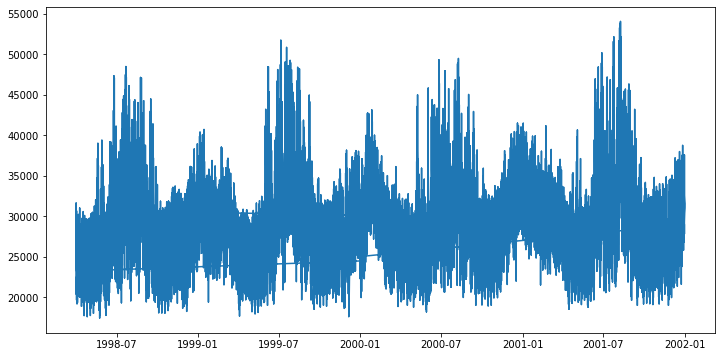

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(data2.Date,data2.PJM_Load_MW) 

plt.show()

✔ Elektrik tüketiminin en fazla 2001-2002 yılları arasında arttığı gözlemlenmektedir.

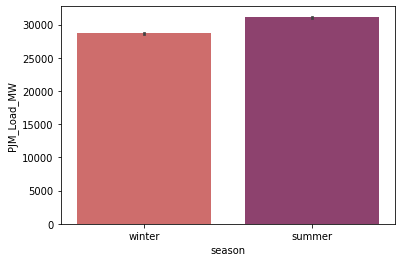

In [ ]:
sns.barplot(x = 'season', y = 'PJM_Load_MW', data = data2,palette="flare")


✔ Yaz sezonlarında daha fazla elektrik harcandığı gözlemlenmektedir.

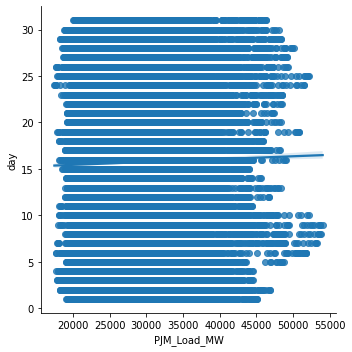

In [ ]:
sns.lmplot(x = 'PJM_Load_MW', y = 'day', data = data2)

✔ Ayın 15'i ve sonrasında elektrik tüketiminin arttığı gözlemlenmiştir.

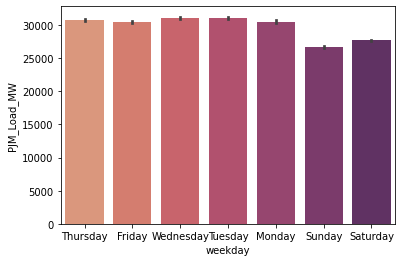

In [ ]:
sns.barplot(x = 'weekday', y = 'PJM_Load_MW', data = data2,palette="flare")

✔ En fazla elektrik kullanımının çarşamba ve salı günlerinde olduğu gözlemlenmektedir.

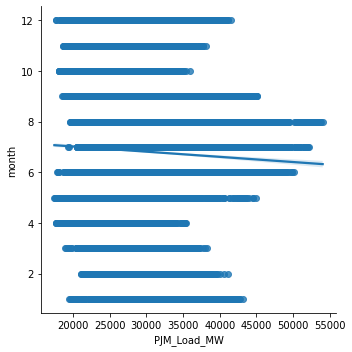

In [ ]:
sns.lmplot(x = 'PJM_Load_MW', y = 'month', data = data2)

✔ Elektrik tüketiminin 6. ve 8. aylar arasında azaldığı gözlemlenmektedir.